### Análise dos Dados do Experimento: Efeito Fotoelétrico
#### Paulo Henrique Lorenzoni Filho

#### Demonstração da equação:
$$\Delta E= K $$
$$hf-W_0=\frac{mv^2}{2} $$
Mas:
$$\frac{mv^2}{2}=eU_0$$
Logo:
$$ U_0=\frac{hf}{e}-\frac{W_0}{e}$$


In [1]:
from uncertainties import ufloat, unumpy
from uncertainties.umath import sin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
alpha_graus=unumpy.uarray([13.5,14.0,15.0,16.5,18.0,19.0,
      20.0,22.0,24.0], [0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25])
alpha_radianos=alpha_graus*np.pi/180
k=1/600
L=k*unumpy.sin(alpha_radianos)*10**6 #Calculando comprimento de onda em nanometros

In [3]:
c=299792458
f=(c/L)*10**(-3)
f

array([770.524939236011+/-14.003943133001068,
       743.5270559290667+/-13.011971234318546,
       694.985466501314+/-11.31724314402878,
       633.3301286503189+/-9.329163074121903,
       582.0892639378505+/-7.816834677931793,
       552.4971418040544+/-7.001249580458913,
       525.9207047016646+/-6.304806710333524,
       480.17167332741207+/-5.185663787697572,
       442.2406435765319+/-4.334039770595847], dtype=object)

In [4]:
unumpy.nominal_values(L)
angulo=['13,5 ± 0,2','13,0  ± 0,2','15.0 ± 0,2','16,5 ± 0,2','18,0 ± 0,2','19,0 ± 0,2','20,0 ± 0,2','22,0  ± 0,2','24,0 ± 0,2']
comprimento_de_onda=['389 ± 7', '403 ± 7' , '431 ± 7', '473 ± 7','515 ± 7', '542 ± 7', '570 ± 7', '624 ± 7','677 ± 7']
frequencia=['770 ± 14','743 ± 13','695 ± 11','636 ± 9','582 ± 8','552 ± 7','525 ± 6','480 ± 5','442 ± 4']
U_0=['0,94 ± 0,01','0,77 ± 0,01','0,73 ± 0,01', '0,57 ± 0,01', '0,45 ± 0,01','0,37 ± 0,01','0,33 ± 0,01','0,20 ± 0,01','0,12 ± 0,01']
dicionario={'𝛼 ± 𝛿𝛼(°)':angulo,'𝜆 ± 𝛿𝜆 (nm)':comprimento_de_onda, '𝑓 ± 𝛿𝑓(e12)𝐻𝑧':frequencia,'𝑈 ± 𝛿𝑈 (𝑉)':U_0}
df=pd.DataFrame(data=dicionario, index=np.arange(1,10,1))
df.to_excel('efeitofoto.xlsx')

In [5]:
model=LinearRegression()
x=unumpy.nominal_values(f)
X=x.reshape(-1,1)
u=[0.94,0.77,0.73,0.57,0.45,0.37,0.33,0.20,0.12]
y_erro=[0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01]
model.fit(X,u)

LinearRegression()

In [6]:
pd.DataFrame(data={'x':x,'dx':unumpy.std_devs(f),'y':u,'dy':y_erro}).to_excel('dad.xlsx')

In [7]:
ajuste=model.coef_[0]*x+model.intercept_ 

In [8]:
model.coef_[0]

0.0023687449232394162

In [9]:
2.3687449232394173e-15


2.3687449232394173e-15

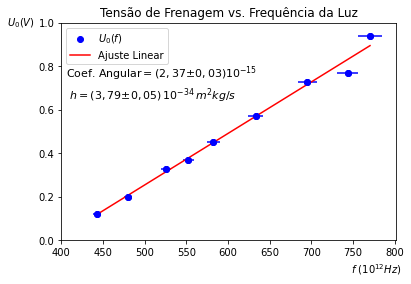

In [10]:
fig,ax=plt.subplots()
ax.set_title('Tensão de Frenagem vs. Frequência da Luz')
ax.set_xlabel('$f \,\,(10^{12}Hz)$')
ax.xaxis.set_label_coords(0.94, -0.1)
ax.set_ylabel('$U_0(V)$', rotation=0, labelpad=15)
ax.yaxis.set_label_coords(-0.12, 0.97)
ax.scatter(x,u, color='blue', label='$U_0(f)$')
ax.errorbar(x,u,yerr=0.01,xerr=unumpy.std_devs(f), fmt='o', color='blue')
ax.plot(X,ajuste, color='red', label='Ajuste Linear')
ax.axes.set_xticks(np.arange(400,850,50))
ax.axes.set_yticks(np.arange(0,1.2,0.2))
ax.legend(loc=0)
ax.text(406,0.65,'Coef. Angular$=(2,37±0,03)10^{-15}$\n $h=(3,79±0,05)\,10^{-34}\,m^2kg/s$',fontsize=11)
#plt.savefig('Questao2.png',dpi=300)
plt.show()

In [11]:
h=1.6*10**(-19)*ufloat(2.3687449232394173e-15,0.03e-15)